In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Importação bibliotecas

In [21]:
caminho_arquivo = 'C:/Users/Henri/Desktop/adult.csv'
df = pd.read_csv(caminho_arquivo, encoding='utf-8', sep=';')

print(df.head())

   id               type     doc  Unnamed: 3  relatives          civil_state  \
0  39          State-gov   77516   Bachelors         13        Never-married   
1  50   Self-emp-not-inc   83311   Bachelors         13   Married-civ-spouse   
2  38            Private  215646     HS-grad          9             Divorced   
3  53            Private  234721        11th          7   Married-civ-spouse   
4  28            Private  338409   Bachelors         13   Married-civ-spouse   

           profession   color   gender  age         country networth  
0        Adm-clerical   White     Male   40   United-States    <=50K  
1     Exec-managerial   White     Male   13   United-States    <=50K  
2   Handlers-cleaners   White     Male   40   United-States    <=50K  
3   Handlers-cleaners   Black     Male   40   United-States    <=50K  
4      Prof-specialty   Black   Female   40            Cuba    <=50K  


#### Carregamento base e apresentação

In [22]:
estatisticas = df.describe()
print(estatisticas)

                 id           doc     relatives           age
count  32561.000000  3.256100e+04  32561.000000  32561.000000
mean      38.581647  1.897784e+05     10.080679     40.437456
std       13.640433  1.055500e+05      2.572720     12.347429
min       17.000000  1.228500e+04      1.000000      1.000000
25%       28.000000  1.178270e+05      9.000000     40.000000
50%       37.000000  1.783560e+05     10.000000     40.000000
75%       48.000000  2.370510e+05     12.000000     45.000000
max       90.000000  1.484705e+06     16.000000     99.000000


#### Describe acima

In [23]:
print(df.columns)

Index(['id', 'type', 'doc', 'Unnamed: 3', 'relatives', 'civil_state',
       'profession', 'color', 'gender', 'age', 'country', 'networth'],
      dtype='object')


#### Print colunas

In [27]:
distrib = df['age'].value_counts()
print(distrib)

age
40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
82        1
92        1
87        1
74        1
94        1
Name: count, Length: 94, dtype: int64


#### Análise univariada

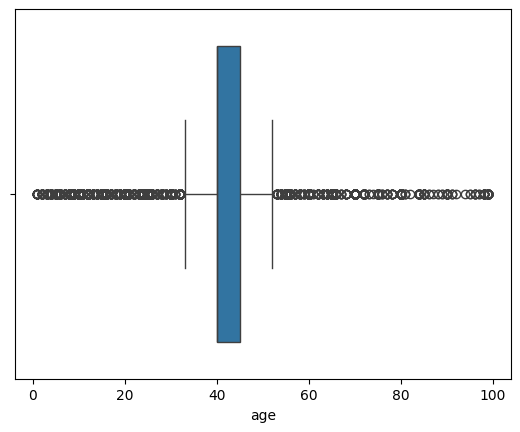

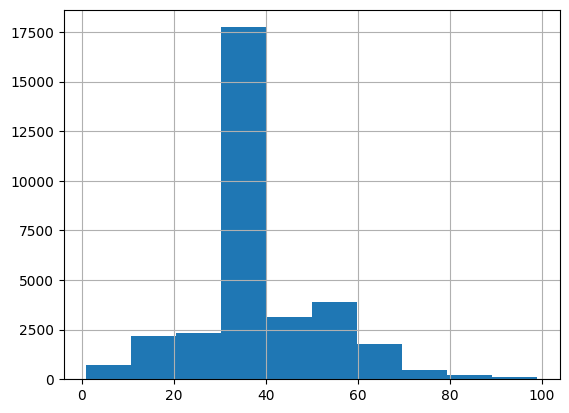

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot
sns.boxplot(x=df['age'])
plt.show()

# Histograma
df['age'].hist()
plt.show()

#### Boxplot e histograma

In [29]:
# Tratamento de valores faltantes
df = df.dropna()  # Ou df.fillna(valor)

# Remoção de outliers (exemplo usando IQR)
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['age'] < (Q1 - 1.5 * IQR)) | (df['age'] > (Q3 + 1.5 * IQR)))]

#### Removendo outliers

In [30]:
print(df.columns)

Index(['id', 'type', 'doc', 'Unnamed: 3', 'relatives', 'civil_state',
       'profession', 'color', 'gender', 'age', 'country', 'networth'],
      dtype='object')


In [ ]:
df_cleaned = df.dropna()

print(df_cleaned)

#### Dropna para tirar valores ausentes

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_padronizado = scaler.fit_transform(df[['age', 'relatives']])

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_normalizado = scaler.fit_transform(df_padronizado)

In [34]:
print(df_padronizado)

[[-0.38984948  1.13850894]
 [-0.38984948 -0.43515896]
 [-0.38984948 -1.22199292]
 ...
 [-0.38984948 -0.43515896]
 [-0.38984948 -0.43515896]
 [-0.38984948 -0.43515896]]


#### Normalização e padronização

In [40]:
from sklearn.model_selection import train_test_split

# Suponha que df seja o seu DataFrame e 'target' seja a coluna alvo
X = df.drop('age', axis=1)  # Características
y = df['age']               # Alvo

# Dividir em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Divisão de dados para treino

In [41]:
from sklearn.preprocessing import LabelEncoder

# Criar um dicionário para armazenar os codificadores
label_encoders = {}

# Percorrer as colunas categóricas e codificá-las
for column in X_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_train[column] = le.fit_transform(X_train[column])
    X_test[column] = le.transform(X_test[column])  # Transformar o conjunto de teste usando o mesmo codificador
    label_encoders[column] = le

#### Codificação de variáveis categóricas

In [42]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Definir as colunas categóricas
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Configurar a transformação para colunas categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # Manter as colunas numéricas inalteradas
)

# Aplicar a transformação
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

#### Preparação de dados para o KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Prever com o modelo treinado
y_pred = knn.predict(X_test)

#### KNN

In [50]:
from sklearn.naive_bayes import GaussianNB

# Criar e treinar o modelo Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# Prever com o modelo treinado
y_pred_nb = nb.predict(X_test)

# Avaliar o modelo
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Acurácia do Naive Bayes: {accuracy_nb:.2f}")

conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print("Matriz de Confusão do Naive Bayes:")
print(conf_matrix_nb)

report_nb = classification_report(y_test, y_pred_nb)
print("Relatório de Classificação do Naive Bayes:")
print(report_nb)


Acurácia do Naive Bayes: 0.64
Matriz de Confusão do Naive Bayes:
[[   0    0    0    0    0    0    0   11    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    6    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0    0    0  255    0    0    0    0    0    0
     0    0    1    0    0    1]
 [   0    0    0    0    0    0    0   44    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0    0    0   25    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0    0    0   96    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    6    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0    0    0 3015    2    0    0    0    0    0
     0    0    2    0    0    3]
 [   0    0    0    0    0    0    0    6    0    0    0    0    0    0
     0    0    0    0  

C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### Naive Bayes

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Criar e treinar o modelo de Árvore de Decisão
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Prever com o modelo treinado
y_pred_dt = dt.predict(X_test)

# Avaliar o modelo
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Acurácia da Árvore de Decisão: {accuracy_dt:.2f}")

conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("Matriz de Confusão da Árvore de Decisão:")
print(conf_matrix_dt)

report_dt = classification_report(y_test, y_pred_dt)
print("Relatório de Classificação da Árvore de Decisão:")
print(report_dt)


#### Arvore de decisão

In [45]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.2f}")

Acurácia: 0.60


In [46]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(conf_matrix)

Matriz de Confusão:
[[   0    0    0    0    0    0    0    9    0    0    0    0    1    0
     0    0    0    1    0    0]
 [   0    0    1    0    0    0    0    4    0    0    0    0    0    0
     0    0    0    1    0    0]
 [   0    0    4    2    0    1    0  243    0    0    0    0    2    0
     0    0    0    5    0    0]
 [   0    0    1    0    0    0    0   40    0    0    0    0    0    0
     0    0    0    3    0    0]
 [   0    0    1    0    0    0    0   23    0    0    0    0    0    0
     0    0    0    1    0    0]
 [   0    0    2    0    0    1    0   91    0    0    0    0    0    0
     0    0    0    2    0    0]
 [   0    0    0    0    0    0    0    5    0    0    0    0    1    0
     0    0    0    0    0    0]
 [   3    1   91    5    4   16    0 2774    0    0    0    3   47    0
     0    2    0   76    0    0]
 [   0    0    0    0    0    0    0    4    0    0    0    0    0    0
     0    0    0    2    0    0]
 [   0    0    1    0    1    0    

In [47]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print("Relatório de Classificação:")
print(report)

Relatório de Classificação:
              precision    recall  f1-score   support

          33       0.00      0.00      0.00        11
          34       0.00      0.00      0.00         6
          35       0.03      0.02      0.02       257
          36       0.00      0.00      0.00        44
          37       0.00      0.00      0.00        25
          38       0.04      0.01      0.02        96
          39       0.00      0.00      0.00         6
          40       0.64      0.92      0.76      3022
          41       0.00      0.00      0.00         6
          42       0.00      0.00      0.00        54
          43       0.00      0.00      0.00        33
          44       0.00      0.00      0.00        45
          45       0.12      0.03      0.04       360
          46       0.00      0.00      0.00        25
          47       0.00      0.00      0.00        11
          48       0.00      0.00      0.00        90
          49       0.00      0.00      0.00         5

C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### Resultados